# Deep learning - ANN

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churn=pd.read_csv('C:/Users/Admin/Desktop/Practisse/Churn_Modelling.csv')

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
import keras

Using TensorFlow backend.


# EDA

churn.corr()

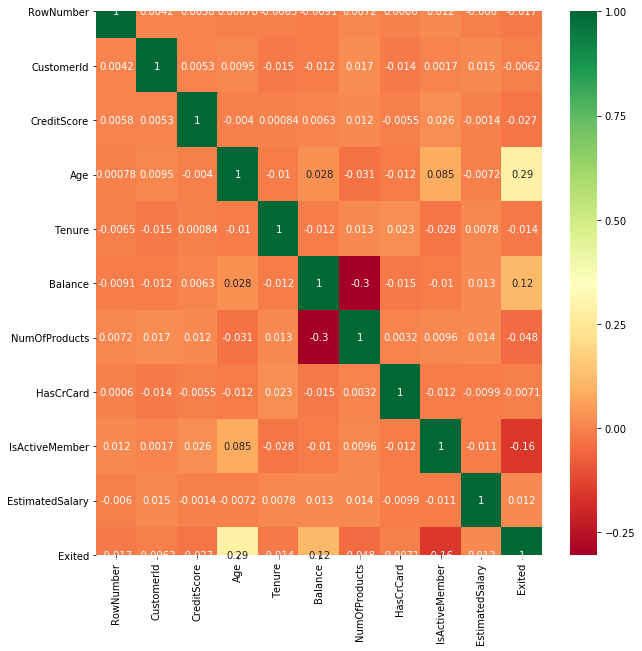

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(churn.corr(),annot=True,cmap='RdYlGn')

In [27]:
pd.crosstab(churn.Geography,churn.Exited,margins=True)

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [75]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
churn.isnull().values.any()

False

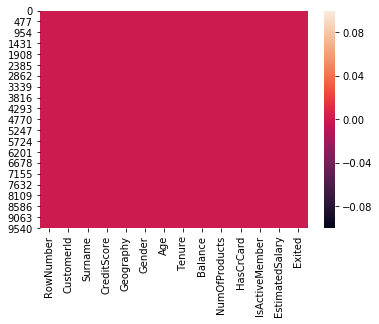

In [26]:
sns.heatmap(churn.isnull())

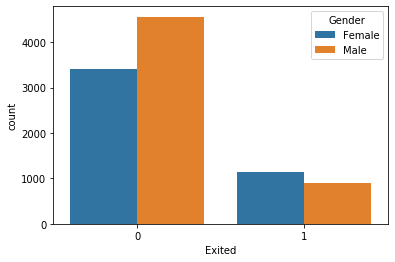

In [33]:
sns.countplot(churn.Exited,hue='Gender',data=churn)

In [36]:
grouping=churn.groupby('Geography')

In [41]:
for Geography,Geography_df in grouping:
    print(Geography)
    print(Geography_df)

France
      RowNumber  CustomerId        Surname  CreditScore Geography  Gender  \
0             1    15634602       Hargrave          619    France  Female   
2             3    15619304           Onio          502    France  Female   
3             4    15701354           Boni          699    France  Female   
6             7    15592531       Bartlett          822    France    Male   
8             9    15792365             He          501    France    Male   
9            10    15592389             H?          684    France    Male   
10           11    15767821         Bearce          528    France    Male   
12           13    15632264            Kay          476    France  Female   
13           14    15691483           Chin          549    France  Female   
19           20    15568982            Hao          726    France  Female   
20           21    15577657       McDonald          732    France    Male   
23           24    15725737         Mosman          669    France    

In [42]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
X=churn.iloc[:,3:13]
y=churn.iloc[:,13]

In [81]:
# Create dummy varibales for Geography ,Gender columns

In [82]:
Geography_dummy=pd.get_dummies(churn.Geography,drop_first=True)

In [83]:
Gender_dummy=pd.get_dummies(churn.Gender,drop_first=True)

In [84]:
Gender_dummy.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [85]:
X=pd.concat([X,Gender_dummy,Geography_dummy],axis=1)

In [87]:
X=X.drop(['Geography','Gender'],axis=1)

In [89]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [90]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
sc=StandardScaler()

In [98]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Lets make Neural Network model

In [100]:
X_test

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         9.09111664e-01,  1.73668197e+00, -5.63491843e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
         9.09111664e-01, -5.75810666e-01, -5.63491843e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -1.09997489e+00, -5.75810666e-01,  1.77464858e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -1.09997489e+00, -5.75810666e-01, -5.63491843e-01],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
         9.09111664e-01, -5.75810666e-01, -5.63491843e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         9.09111664e-01,  1.73668197e+00, -5.63491843e-01]])

In [101]:
import keras


In [106]:
#importing keras libararies and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout

In [108]:
#Initalising the ANN

In [110]:
classifier=Sequential()

In [113]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=11))

In [115]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform'))

In [117]:
classifier.add(Dense(output_dim=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", kernel_initializer="glorot_uniform", units=1)`
  """Entry point for launching an IPython kernel.


In [119]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [122]:
import warnings
warnings.filterwarnings('ignore')

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [123]:
#fitting the Training Set

In [124]:
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 5s 911us/step - loss: 0.6601 - acc: 0.6591 - val_loss: 0.5922 - val_acc: 0.7910
Epoch 2/100
5359/5359 [==============================] - 1s 253us/step - loss: 0.5616 - acc: 0.7962 - val_loss: 0.5435 - val_acc: 0.7910
Epoch 3/100
5359/5359 [==============================] - 1s 238us/step - loss: 0.5245 - acc: 0.7962 - val_loss: 0.5127 - val_acc: 0.7910
Epoch 4/100
5359/5359 [==============================] - 1s 240us/step - loss: 0.4943 - acc: 0.7962 - val_loss: 0.4855 - val_acc: 0.7910
Epoch 5/100
5359/5359 [==============================] - 1s 235us/step - loss: 0.4720 - acc: 0.7962 - val_loss: 0.4697 - val_acc: 0.7910
Epoch 6/100
5359/5359 [==============================] - 1s 247us/step - loss: 0.4579 - acc: 0.7962 - val_loss: 0.4597 - val_acc: 0.7910
Epoch 7/100
5359/5359 [==============================] - 1s 238us/step - loss: 0.4471 - acc: 0.7962 - val_loss: 0.4506 - val_acc:

In [125]:
ypred=classifier.predict(X_test)

In [128]:
ypred=(ypred>0.5)

In [130]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion_matrix(y_test,ypred)

array([[1528,   79],
       [ 201,  192]], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score

In [135]:
acc=accuracy_score(y_test,ypred)

In [136]:
acc*100

86.0

# Acc=86.0